In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

#warnings removal
import warnings
warnings.filterwarnings('ignore')

#ML models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [37]:
#for hyperparameter tuning
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline

In [2]:
#data reading
sampledf = pd.read_csv('Task 1 Prodigy Internship/sample_submission.csv')
traindf = pd.read_csv('Task 1 Prodigy Internship/train.csv')
testdf = pd.read_csv('Task 1 Prodigy Internship/test.csv')

In [3]:
sampledf

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [4]:
traindf

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
testdf

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [6]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
missing_values_train = traindf.isnull().sum()
missing_columns_train = missing_values_train[missing_values_train > 0]
print(missing_columns_train)

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [7]:
traindf.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [10]:
missing_values = testdf.isnull().sum()
missing_columns = missing_values[missing_values > 0]

print("Columns with missing values:")
print(missing_columns)

Columns with missing values:
MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


In [8]:
num_cols = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
cat_cols = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
            'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
            'PoolQC', 'Fence', 'MiscFeature']

In [13]:
#imputing numerical columns with median in traindf
imputer_num = SimpleImputer(strategy='median')
traindf[num_cols] = imputer_num.fit_transform(traindf[num_cols])

In [14]:
#impute categorical columns with 'None' in traindf
imputer_cat = SimpleImputer(strategy='constant', fill_value='None')
traindf[cat_cols] = imputer_cat.fit_transform(traindf[cat_cols])

In [15]:
#encoding categorical variables in traindf
traindf = pd.get_dummies(traindf, columns=cat_cols)

In [16]:
#normalizing numerical features
scaler = StandardScaler()
traindf[num_cols] = scaler.fit_transform(traindf[num_cols])

In [17]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 150 entries, Id to MiscFeature_TenC
dtypes: float64(3), int64(35), object(27), uint8(85)
memory usage: 862.7+ KB


In [19]:
print(traindf.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
                   ..
MiscFeature_Gar2    0
MiscFeature_None    0
MiscFeature_Othr    0
MiscFeature_Shed    0
MiscFeature_TenC    0
Length: 150, dtype: int64


In [20]:
print(traindf.isnull().sum().sum())

0


In [21]:
#imputing numerical columns with median in testdf
numerical_cols_testdf = testdf.select_dtypes(include=['float64', 'int64']).columns
imputer_num = SimpleImputer(strategy='median')
testdf[numerical_cols_testdf] = imputer_num.fit_transform(testdf[numerical_cols_testdf])

In [22]:
#impute categorical columns with mode
categorical_cols_testdf = testdf.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
testdf[categorical_cols_testdf] = imputer_cat.fit_transform(testdf[categorical_cols_testdf])

#checking if all missing values are imputed
print(testdf.isnull().sum().sum())

0


In [23]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   float64
 1   MSSubClass     1459 non-null   float64
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   float64
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   float64
 18  OverallC

In [24]:
traindf.head(8)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,1,60,RL,-0.220875,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,1,0,1,0,0,0
1,2,20,RL,0.460320,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,1,0,1,0,0,0
2,3,60,RL,-0.084636,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,1,0,1,0,0,0
3,4,70,RL,-0.447940,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,1,0,1,0,0,0
4,5,60,RL,0.641972,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,1,0,1,0,0,0
5,6,50,RL,0.687385,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,0,1,0,0,0,0,0,1,0
6,7,20,RL,0.233255,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,1,0,1,0,0,0
7,8,60,RL,-0.039223,10382,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,1,0,0,0,1,0


In [25]:
testdf.head(8)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461.0,20.0,RH,80.0,11622.0,Pave,Grvl,Reg,Lvl,AllPub,...,120.0,0.0,Ex,MnPrv,Shed,0.0,6.0,2010.0,WD,Normal
1,1462.0,20.0,RL,81.0,14267.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,0.0,Ex,MnPrv,Gar2,12500.0,6.0,2010.0,WD,Normal
2,1463.0,60.0,RL,74.0,13830.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,0.0,Ex,MnPrv,Shed,0.0,3.0,2010.0,WD,Normal
3,1464.0,60.0,RL,78.0,9978.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,0.0,Ex,MnPrv,Shed,0.0,6.0,2010.0,WD,Normal
4,1465.0,120.0,RL,43.0,5005.0,Pave,Grvl,IR1,HLS,AllPub,...,144.0,0.0,Ex,MnPrv,Shed,0.0,1.0,2010.0,WD,Normal
5,1466.0,60.0,RL,75.0,10000.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,0.0,Ex,MnPrv,Shed,0.0,4.0,2010.0,WD,Normal
6,1467.0,20.0,RL,67.0,7980.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,0.0,Ex,GdPrv,Shed,500.0,3.0,2010.0,WD,Normal
7,1468.0,60.0,RL,63.0,8402.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,0.0,Ex,MnPrv,Shed,0.0,5.0,2010.0,WD,Normal


In [52]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 151 entries, Id to TotalSF
dtypes: float64(38), int64(86), object(27)
memory usage: 1.7+ MB


In [26]:
traindf, testdf = traindf.align(testdf, join='left', axis=1, fill_value=0)

In [27]:
#feature engineering: (TotalSF) that represents the total living space area in the house
traindf['TotalSF'] = traindf['TotalBsmtSF'] + traindf['1stFlrSF'] + traindf['2ndFlrSF']
testdf['TotalSF'] = testdf['TotalBsmtSF'] + testdf['1stFlrSF'] + testdf['2ndFlrSF']

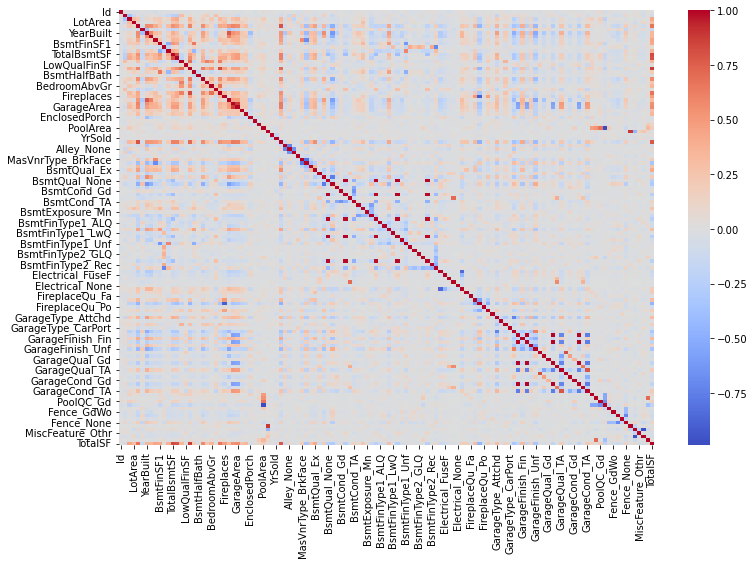

In [28]:
#corr matrix for feature selection
corr_matrix = traindf.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()

In [29]:
#selecting top 10 correlated features with SalePrice
top_features = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(11).index
print(top_features)

Index(['SalePrice', 'OverallQual', 'TotalSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'BsmtQual_Ex',
       'TotRmsAbvGrd'],
      dtype='object')


In [30]:
top_features = ['OverallQual', 'TotalSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'BsmtQual_Ex',
       'TotRmsAbvGrd']
target = 'SalePrice'

x = traindf[top_features]
y = traindf[target]

In [31]:
#train test split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=42)

In [32]:
#linear regressiion model
lrmodel = LinearRegression()

In [33]:
lrmodel.fit(x_train, y_train)

LinearRegression()

In [35]:
y_pred_val = lrmodel.predict(x_val)
y_pred_train = lrmodel.predict(x_train)

In [36]:
train_mse = mean_squared_error(y_train, y_pred_train)
val_mse = mean_squared_error(y_val, y_pred_val)
train_r2 = r2_score(y_train, y_pred_train)
val_r2 = r2_score(y_val, y_pred_val)

print("Training MSE:", train_mse)
print("Validation MSE:", val_mse)
print("Training R-squared:", train_r2)
print("Validation R-squared:", val_r2)

Training MSE: 1386317931.5713215
Validation MSE: 1274605160.556848
Training R-squared: 0.7716659046172539
Validation R-squared: 0.8180515447592976


In [38]:
#hyperparameter tuning for Linear Regression typically involves selecting and tuning regularization parameters like alpha for Ridge and Lasso regression
#standardizing the data and setting up the pipeline
pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

In [39]:
#defining the parameter grid for Ridge and Lasso regression
param_grid_ridge = {
    'ridge__alpha': [0.1, 1.0, 10.0, 100.0]
}

param_grid_lasso = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}

In [40]:
#GridSearchCV for Ridge
grid_search_ridge = GridSearchCV(pipeline_ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.1, 1.0, 10.0, 100.0]},
             scoring='neg_mean_squared_error')

In [41]:
#GridSearchCV for Lasso
grid_search_lasso = GridSearchCV(pipeline_lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.001, 0.01, 0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [42]:
print("Best parameters for Ridge:", grid_search_ridge.best_params_)
print("Best cross-validation score for Ridge (MSE):", -grid_search_ridge.best_score_)

print("Best parameters for Lasso:", grid_search_lasso.best_params_)
print("Best cross-validation score for Lasso (MSE):", -grid_search_lasso.best_score_)


Best parameters for Ridge: {'ridge__alpha': 100.0}
Best cross-validation score for Ridge (MSE): 1668271409.9162865
Best parameters for Lasso: {'lasso__alpha': 10.0}
Best cross-validation score for Lasso (MSE): 1720557870.111383


In [43]:
#importing the best models
best_ridge = grid_search_ridge.best_estimator_
best_lasso = grid_search_lasso.best_estimator_

In [44]:
#predicting on the validation set
y_val_pred_ridge = best_ridge.predict(x_val)
y_val_pred_lasso = best_lasso.predict(x_val)

In [45]:
#calculating performance metrics for Ridge
mse_val_ridge = mean_squared_error(y_val, y_val_pred_ridge)
r2_val_ridge = r2_score(y_val, y_val_pred_ridge)

In [46]:
#calculating performance metrics for Lasso
mse_val_lasso = mean_squared_error(y_val, y_val_pred_lasso)
r2_val_lasso = r2_score(y_val, y_val_pred_lasso)

In [47]:
print("Ridge Regression - Validation MSE:", mse_val_ridge)
print("Ridge Regression - Validation R-squared:", r2_val_ridge)

print("Lasso Regression - Validation MSE:", mse_val_lasso)
print("Lasso Regression - Validation R-squared:", r2_val_lasso)

Ridge Regression - Validation MSE: 1299282918.0553164
Ridge Regression - Validation R-squared: 0.8145288225904266
Lasso Regression - Validation MSE: 1275106543.3689804
Lasso Regression - Validation R-squared: 0.8179799729259372


In [50]:
#using the best Lasso model
best_lasso = grid_search_lasso.best_estimator_

#predicting on the validation set
y_val_pred_lasso = best_lasso.predict(x_val)

#calculating performance metrics
mse_val_lasso = mean_squared_error(y_val, y_val_pred_lasso)
r2_val_lasso = r2_score(y_val, y_val_pred_lasso)

print("Lasso Regression - Validation MSE:", mse_val_lasso)
print("Lasso Regression - Validation R-squared:", r2_val_lasso)

Lasso Regression - Validation MSE: 1275106543.3689804
Lasso Regression - Validation R-squared: 0.8179799729259372


In [51]:
#initializing the Lasso model with the best alpha parameter
best_alpha = 10.0  #the best alpha from tuning
lasso_model = Lasso(alpha=best_alpha, random_state=42)

#fitting the model on the full training data
lasso_model.fit(x, y)

Lasso(alpha=10.0, random_state=42)

In [53]:
#predicting on the test set
test_predictions = lasso_model.predict(testdf[top_features])

#creating a submission DataFrame
submission = pd.DataFrame({
    'Id': testdf['Id'],  #ensuring 'Id' column exists in the test data
    'SalePrice': test_predictions
})

In [54]:
submission

,Id,SalePrice
0,1461.0,111754.030154
1,1462.0,159696.391655
2,1463.0,161710.566068
3,1464.0,178767.594369
4,1465.0,216281.092046
...,...,...
1454,2915.0,71533.811083
1455,2916.0,86384.195450
1456,2917.0,146311.588105
1457,2918.0,94432.636597


In [60]:
sampledf

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [59]:
submission = submission.rename(columns={'SalePrice': 'SalePrice_your'})
comparison_df = pd.merge(sampledf[['Id', 'SalePrice']], submission[['Id', 'SalePrice_your']], on='Id')

#calculating price difference
comparison_df['Price_difference'] = comparison_df['SalePrice_your'] - comparison_df['SalePrice']

print(comparison_df.head())

     Id      SalePrice  SalePrice_your  Price_difference
0  1461  169277.052498   111754.030154     -57523.022344
1  1462  187758.393989   159696.391655     -28062.002334
2  1463  183583.683570   161710.566068     -21873.117502
3  1464  179317.477511   178767.594369       -549.883142
4  1465  150730.079977   216281.092046      65551.012069


In [61]:
comparison_df

,Id,SalePrice,SalePrice_your,Price_difference
0,1461,169277.052498,111754.030154,-57523.022344
1,1462,187758.393989,159696.391655,-28062.002334
2,1463,183583.683570,161710.566068,-21873.117502
3,1464,179317.477511,178767.594369,-549.883142
4,1465,150730.079977,216281.092046,65551.012069
...,...,...,...,...
1454,2915,167081.220949,71533.811083,-95547.409866
1455,2916,164788.778231,86384.195450,-78404.582781
1456,2917,219222.423400,146311.588105,-72910.835295
1457,2918,184924.279659,94432.636597,-90491.643062


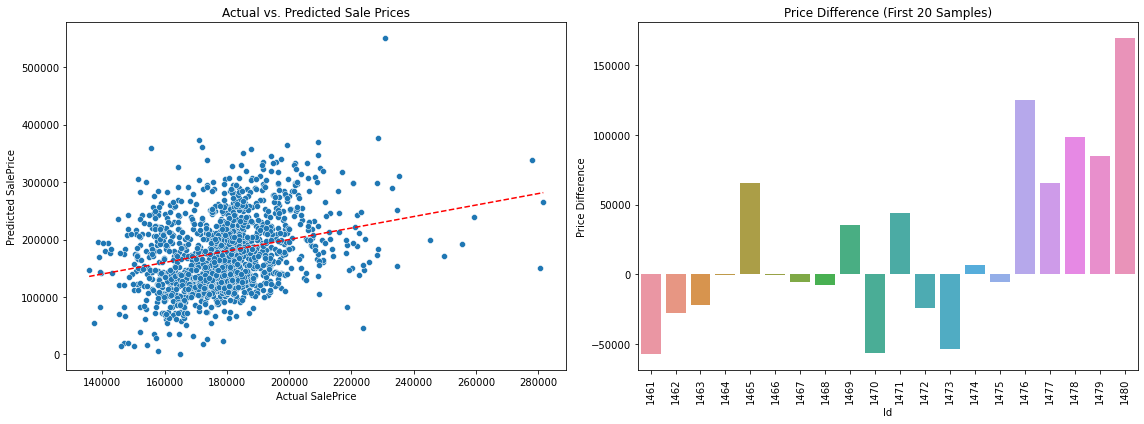

In [85]:
#subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#scatter plot of actual vs predicted values
sns.scatterplot(x='SalePrice', y='SalePrice_your', data=comparison_df, ax=axes[0])
axes[0].plot([comparison_df['SalePrice'].min(), comparison_df['SalePrice'].max()],
             [comparison_df['SalePrice'].min(), comparison_df['SalePrice'].max()],
             'r--')  # Diagonal line for reference
axes[0].set_title('Actual vs. Predicted Sale Prices')
axes[0].set_xlabel('Actual SalePrice')
axes[0].set_ylabel('Predicted SalePrice')

#bar plot of price differences
sns.barplot(x='Id', y='Price_difference', data=comparison_df.head(20), ax=axes[1])
axes[1].set_title('Price Difference (First 20 Samples)')
axes[1].set_xlabel('Id')
axes[1].set_ylabel('Price Difference')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability

# Adjust layout
plt.tight_layout()

plt.show()

In [65]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor()
cat_model.fit(x_train, y_train)
cat_predictions = cat_model.predict(x_val)

cat_rmse = np.sqrt(mean_squared_error(y_val, cat_predictions))
mae_cat = mean_absolute_error(y_val, cat_predictions)
r2_cat = r2_score(y_val, cat_predictions)

print(f'CatBoost MAE: {mae_cat}')
print(f'CatBoost RMSE: {cat_rmse}')
print(f'CatBoost R-squared: {r2_cat}')

Learning rate set to 0.041534
0:	learn: 75751.4680094	total: 2.72ms	remaining: 2.71s
1:	learn: 73624.7894752	total: 5.11ms	remaining: 2.55s
2:	learn: 71561.6283835	total: 7.25ms	remaining: 2.41s
3:	learn: 69763.8599372	total: 9.16ms	remaining: 2.28s
4:	learn: 67889.0303855	total: 11.2ms	remaining: 2.23s
5:	learn: 66216.5361260	total: 13.1ms	remaining: 2.17s
6:	learn: 64597.2418892	total: 14.9ms	remaining: 2.12s
7:	learn: 63027.2801324	total: 16.7ms	remaining: 2.07s
8:	learn: 61526.4672936	total: 18.7ms	remaining: 2.06s
9:	learn: 60002.9214992	total: 20.7ms	remaining: 2.05s
10:	learn: 58592.9403727	total: 22.4ms	remaining: 2.01s
11:	learn: 57306.3278757	total: 24.1ms	remaining: 1.99s
12:	learn: 56062.9440433	total: 25.7ms	remaining: 1.95s
13:	learn: 54836.4807356	total: 27.6ms	remaining: 1.94s
14:	learn: 53602.3326607	total: 29.3ms	remaining: 1.93s
15:	learn: 52537.1795430	total: 31ms	remaining: 1.91s
16:	learn: 51452.2771919	total: 32.7ms	remaining: 1.89s
17:	learn: 50475.4116629	total

In [69]:
test_predictions2 = cat_model.predict(testdf[top_features])

In [71]:
submission2 = pd.DataFrame({
    'Id': testdf['Id'],  # Ensure 'Id' column exists in the test data
    'SalePrice': test_predictions2
})
print(submission2.head())

       Id      SalePrice
0  1461.0  127447.768343
1  1462.0  155458.941600
2  1463.0  164996.223390
3  1464.0  180616.969216
4  1465.0  207233.607612


In [72]:
comparison2 = pd.merge(sampledf, submission2, on='Id', suffixes=('_sample', '_your'))

In [74]:
comparison2['Price_difference'] = comparison2['SalePrice_your'] - comparison2['SalePrice_sample']
print(comparison2.head())

     Id  SalePrice_sample  SalePrice_your  Price_difference
0  1461     169277.052498   127447.768343     -41829.284155
1  1462     187758.393989   155458.941600     -32299.452389
2  1463     183583.683570   164996.223390     -18587.460179
3  1464     179317.477511   180616.969216       1299.491705
4  1465     150730.079977   207233.607612      56503.527636


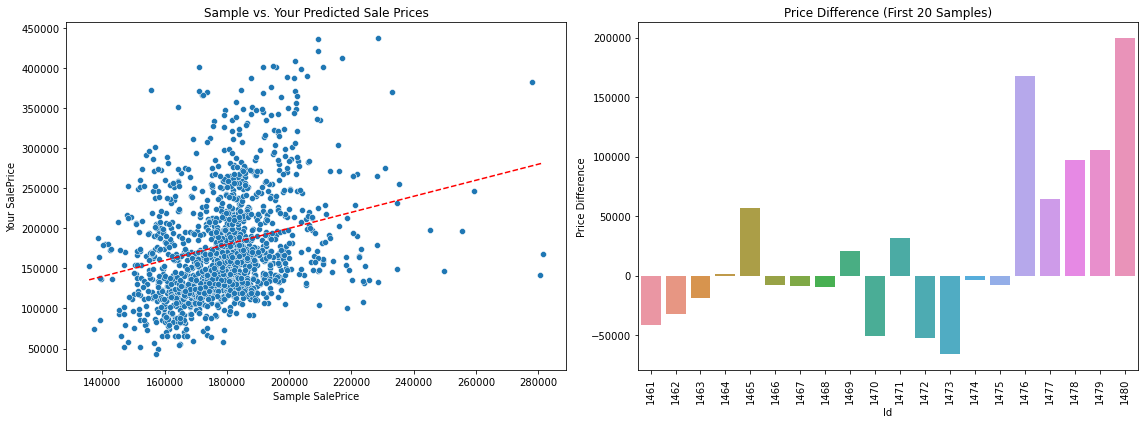

In [88]:
#subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#scatter plot of actual vs predicted values
sns.scatterplot(x='SalePrice_sample', y='SalePrice_your', data=comparison2, ax=axes[0])
axes[0].plot([comparison2['SalePrice_sample'].min(), comparison2['SalePrice_sample'].max()],
             [comparison2['SalePrice_sample'].min(), comparison2['SalePrice_sample'].max()],
             'r--')  # Diagonal line for reference
axes[0].set_title('Sample vs. Your Predicted Sale Prices')
axes[0].set_xlabel('Sample SalePrice')
axes[0].set_ylabel('Your SalePrice')

#bar plot of price differences
sns.barplot(x='Id', y='Price_difference', data=comparison2.head(20), ax=axes[1])
axes[1].set_title('Price Difference (First 20 Samples)')
axes[1].set_xlabel('Id')
axes[1].set_ylabel('Price Difference')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability

#adjust layout
plt.tight_layout()
plt.show()

In [89]:
#converting 'SalePrice' and 'SalePrice_your' columns from float to int in comparison_df
comparison_df['SalePrice'] = comparison_df['SalePrice'].astype(int)
comparison_df['SalePrice_your'] = comparison_df['SalePrice_your'].astype(int)
comparison_df['Price_difference'] = comparison_df['Price_difference'].astype(int)

In [90]:
#converting 'SalePrice_sample', 'SalePrice_your', and 'Price_difference' columns from float to int in comparison2
comparison2['SalePrice_sample'] = comparison2['SalePrice_sample'].astype(int)
comparison2['SalePrice_your'] = comparison2['SalePrice_your'].astype(int)
comparison2['Price_difference'] = comparison2['Price_difference'].astype(int)

In [91]:
comparison_df

,Id,SalePrice,SalePrice_your,Price_difference
0,1461,169277,111754,-57523
1,1462,187758,159696,-28062
2,1463,183583,161710,-21873
3,1464,179317,178767,-549
4,1465,150730,216281,65551
...,...,...,...,...
1454,2915,167081,71533,-95547
1455,2916,164788,86384,-78404
1456,2917,219222,146311,-72910
1457,2918,184924,94432,-90491


In [92]:
comparison2

,Id,SalePrice_sample,SalePrice_your,Price_difference
0,1461,169277,127447,-41829
1,1462,187758,155458,-32299
2,1463,183583,164996,-18587
3,1464,179317,180616,1299
4,1465,150730,207233,56503
...,...,...,...,...
1454,2915,167081,66194,-100886
1455,2916,164788,87718,-77070
1456,2917,219222,147586,-71636
1457,2918,184924,105677,-79246


In [93]:
#calculating the differences between the last 2 comparisons
#comparison_diff = comparison2.copy()
comparison_diff['Price_difference_previous'] = comparison_df['Price_difference']
comparison_diff['Price_difference_new'] = comparison2['Price_difference']
comparison_diff['Difference_in_Difference'] = comparison_diff['Price_difference_new'] - comparison_diff['Price_difference_previous']

comparison_diff.head()

,Id,SalePrice_sample,SalePrice_your,Price_difference,Price_difference_previous,Price_difference_new,Difference_in_Difference
0,1461,169277.052498,127447.768343,-41829.284155,-57523,-41829,15694
1,1462,187758.393989,155458.941600,-32299.452389,-28062,-32299,-4237
2,1463,183583.683570,164996.223390,-18587.460179,-21873,-18587,3286
3,1464,179317.477511,180616.969216,1299.491705,-549,1299,1848
4,1465,150730.079977,207233.607612,56503.527636,65551,56503,-9048


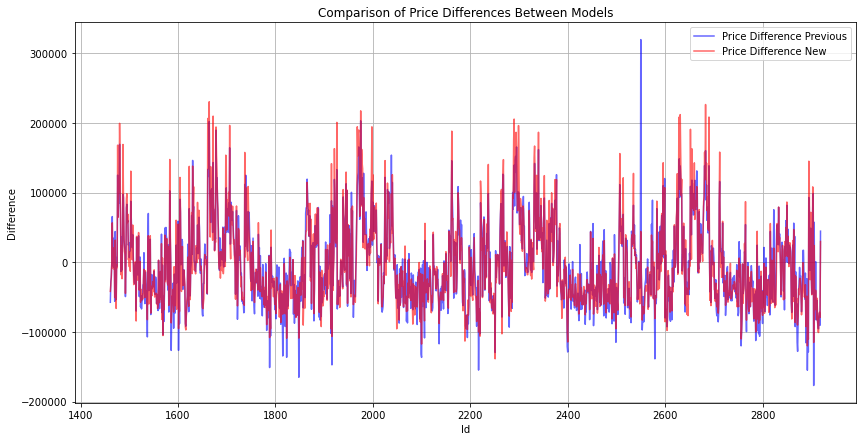

In [95]:
#plotting the comparison
plt.figure(figsize=(14, 7))

#plotting Price Difference Previous
plt.plot(comparison_diff['Id'], comparison_diff['Price_difference_previous'], label='Price Difference Previous', color='blue', alpha=0.6)

#plotting Price Difference New
plt.plot(comparison_diff['Id'], comparison_diff['Price_difference_new'], label='Price Difference New', color='red', alpha=0.6)

#titles and labels
plt.title('Comparison of Price Differences Between Models')
plt.xlabel('Id')
plt.ylabel('Difference')
plt.legend()
plt.grid(True)

plt.show()

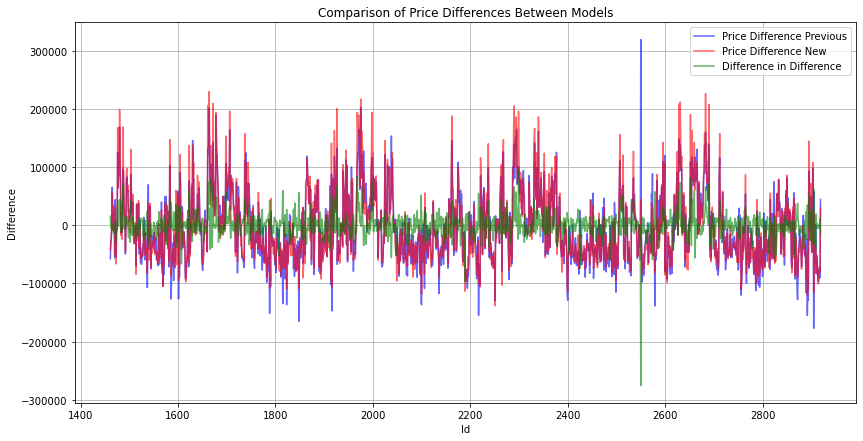

In [94]:
#plotting the comparison
plt.figure(figsize=(14, 7))

#plotting Price Difference Previous
plt.plot(comparison_diff['Id'], comparison_diff['Price_difference_previous'], label='Price Difference Previous', color='blue', alpha=0.6)

#plotting Price Difference New
plt.plot(comparison_diff['Id'], comparison_diff['Price_difference_new'], label='Price Difference New', color='red', alpha=0.6)

#plotting Difference in Difference
plt.plot(comparison_diff['Id'], comparison_diff['Difference_in_Difference'], label='Difference in Difference', color='green', alpha=0.6)

#titles and labels
plt.title('Comparison of Price Differences Between Models')
plt.xlabel('Id')
plt.ylabel('Difference')
plt.legend()
plt.grid(True)

plt.show()